# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [21]:
# Dependencies and Setup
import sys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
!pip install citipy
from citipy import citipy

# Output File (CSV)
output_data_file = r"C:\Users\Kaleb\PycharmProjects\python-api\output_data\cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [13]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
response = requests.get(query_url +"Peoria").json()
response


{'coord': {'lon': -89.77, 'lat': 40.77},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02d'}],
 'base': 'stations',
 'main': {'temp': 26.31,
  'feels_like': 23.34,
  'temp_min': 23.89,
  'temp_max': 27.78,
  'pressure': 1012,
  'humidity': 57},
 'visibility': 10000,
 'wind': {'speed': 7.7, 'deg': 190, 'gust': 11.8},
 'clouds': {'all': 20},
 'dt': 1603400916,
 'sys': {'type': 1,
  'id': 5354,
  'country': 'US',
  'sunrise': 1603369107,
  'sunset': 1603408090},
 'timezone': -18000,
 'id': 4905697,
 'name': 'Peoria',
 'cod': 200}

In [4]:
# set lists for the dataframe
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities for organization
count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Processing Record 1 of Set 1 | nikolskoye
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | victoria
Processing Record 4 of Set 1 | mount gambier
Processing Record 5 of Set 1 | cape town
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | new norfolk
Processing Record 8 of Set 1 | castro
Processing Record 9 of Set 1 | carnarvon
Processing Record 10 of Set 1 | palmer
Processing Record 11 of Set 1 | arlit
Processing Record 12 of Set 1 | namibe
Processing Record 13 of Set 1 | upernavik
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | tasiilaq
Processing Record 16 of Set 1 | longyearbyen
Processing Record 17 of Set 1 | yellowknife
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | ust-nera
Processing Record 20 of Set 1 | mataura
Processing Record 21 of Set 1 | deputatskiy
Processing Record 22 of Set 1 | san andres
Processing Record 23 of Set 1 | airai
Processing Record 24 of Set 1 | baculin
Processing 

Processing Record 38 of Set 4 | arraial do cabo
Processing Record 39 of Set 4 | svetlyy
Processing Record 40 of Set 4 | mandalgovi
Processing Record 41 of Set 4 | hermanus
Processing Record 42 of Set 4 | laguna
Processing Record 43 of Set 4 | pitlochry
Processing Record 44 of Set 4 | nguru
Processing Record 45 of Set 4 | ajaccio
Processing Record 46 of Set 4 | torbay
Processing Record 47 of Set 4 | margate
City not found. Skipping...
Processing Record 48 of Set 4 | ancud
Processing Record 49 of Set 4 | ribeira grande
Processing Record 1 of Set 5 | dingle
Processing Record 2 of Set 5 | dromolaxia
Processing Record 3 of Set 5 | fortuna
City not found. Skipping...
Processing Record 4 of Set 5 | souillac
Processing Record 5 of Set 5 | juneau
Processing Record 6 of Set 5 | geraldton
Processing Record 7 of Set 5 | rio cuarto
Processing Record 8 of Set 5 | parkes
Processing Record 9 of Set 5 | manta
Processing Record 10 of Set 5 | sorland
City not found. Skipping...
City not found. Skipping..

Processing Record 25 of Set 8 | andenes
City not found. Skipping...
Processing Record 26 of Set 8 | olinda
Processing Record 27 of Set 8 | kungurtug
Processing Record 28 of Set 8 | jumla
City not found. Skipping...
Processing Record 29 of Set 8 | nampula
Processing Record 30 of Set 8 | nyuksenitsa
Processing Record 31 of Set 8 | union
City not found. Skipping...
Processing Record 32 of Set 8 | beyla
City not found. Skipping...
Processing Record 33 of Set 8 | mahanoro
Processing Record 34 of Set 8 | lumby
Processing Record 35 of Set 8 | gornopravdinsk
Processing Record 36 of Set 8 | amboasary
Processing Record 37 of Set 8 | turukhansk
Processing Record 38 of Set 8 | atikokan
Processing Record 39 of Set 8 | padang
Processing Record 40 of Set 8 | buraydah
Processing Record 41 of Set 8 | beidao
Processing Record 42 of Set 8 | san patricio
Processing Record 43 of Set 8 | guarare
Processing Record 44 of Set 8 | rahimatpur
Processing Record 45 of Set 8 | sayyan
Processing Record 46 of Set 8 |

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_dict = {
    "City":city_two,
    "Cloudiness": cloudinesses,
    "Country": countries,
    "Date": dates,
    "Humidity": humidities,
    "Lat": lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}

In [6]:
weather_dataframe = pd.DataFrame(weather_dict)

In [7]:
weather_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,nikolskoye,90,RU,1603400985,93,59.70,30.79,9.44,3.00
1,busselton,0,AU,1603400966,66,-33.65,115.33,10.00,4.57
2,victoria,100,HK,1603400964,46,22.29,114.16,21.67,5.81
3,mount gambier,30,GB,1603401006,84,53.66,-1.85,7.78,0.45
4,cape town,0,CL,1603400694,24,-36.41,-71.90,26.00,3.10


In [23]:
weather_dataframe.to_csv(output_data_file)

In [24]:
weather_dataframe.count()

City          530
Cloudiness    530
Country       530
Date          530
Humidity      530
Lat           530
Lng           530
Max Temp      530
Wind Speed    530
dtype: int64

In [25]:
weather_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,nikolskoye,90,RU,1603400985,93,59.70,30.79,9.44,3.00
1,busselton,0,AU,1603400966,66,-33.65,115.33,10.00,4.57
2,victoria,100,HK,1603400964,46,22.29,114.16,21.67,5.81
3,mount gambier,30,GB,1603401006,84,53.66,-1.85,7.78,0.45
4,cape town,0,CL,1603400694,24,-36.41,-71.90,26.00,3.10


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [34]:
excess_humidity = weather_dataframe.loc[weather_dataframe["Humidity"] > 100]
excess_humidity.count()

City          0
Cloudiness    0
Country       0
Date          0
Humidity      0
Lat           0
Lng           0
Max Temp      0
Wind Speed    0
dtype: int64

In [30]:
#  Get the indices of cities that have humidity over 100%.

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

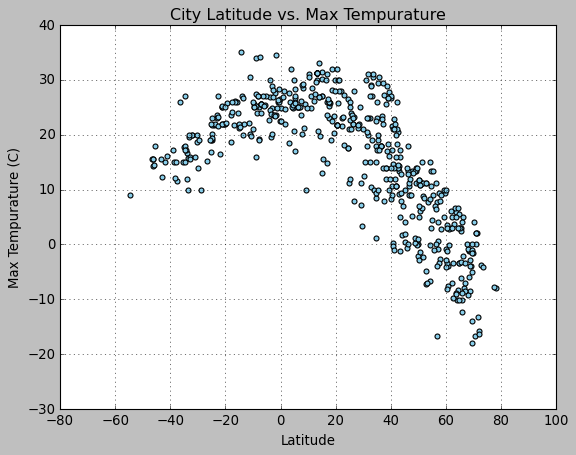

In [46]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Max Temp"], 
            edgecolors="black", facecolors="skyblue")
plt.title('City Latitude vs. Max Tempurature')
plt.xlabel("Latitude")
plt.ylabel("Max Tempurature (C)")
plt.style.use("classic")
plt.grid()
plt.show()

## Latitude vs. Humidity Plot

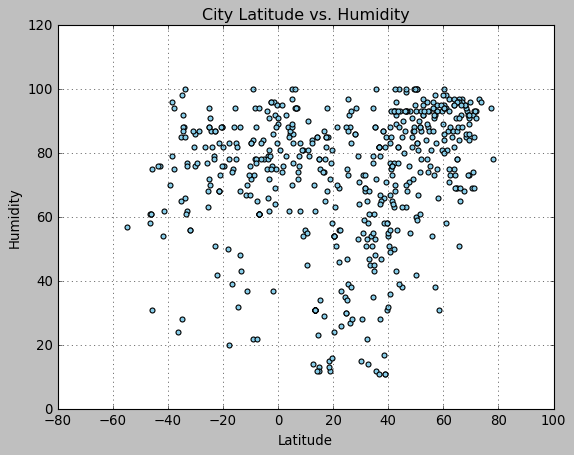

In [42]:
plt.scatter(weather_dataframe['Lat'], weather_dataframe['Humidity'],
            edgecolors="black", facecolors="skyblue")
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()
plt.show()

## Latitude vs. Cloudiness Plot

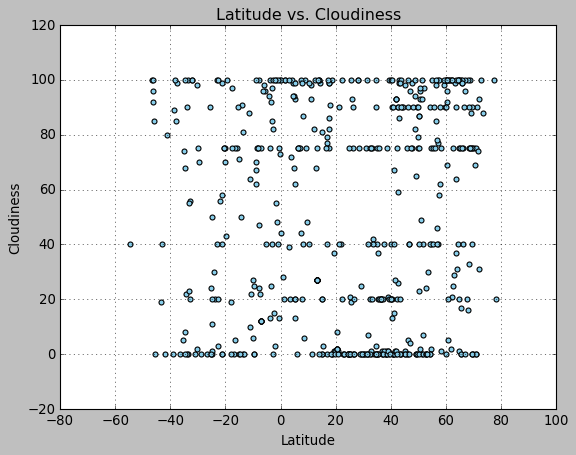

In [43]:
plt.scatter(weather_dataframe["Lat"], weather_dataframe["Cloudiness"],
            edgecolors="black", facecolors="skyblue")
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()
plt.show()

## Latitude vs. Wind Speed Plot

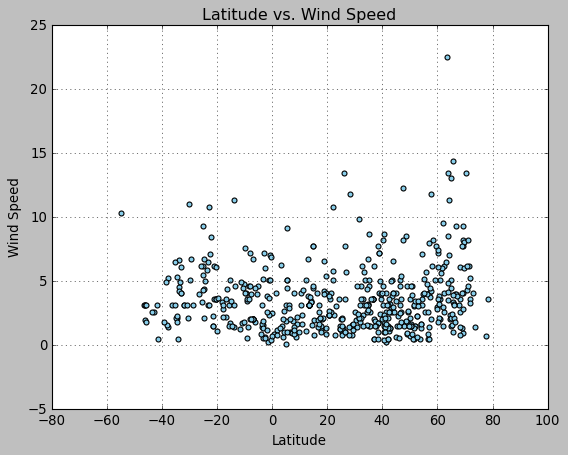

In [45]:
plt.scatter(weather_dataframe['Lat'], weather_dataframe['Wind Speed'], 
            edgecolors="black", facecolors="skyblue")
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()
plt.show()

## Linear Regression

In [57]:
L=0
Northern= weather_dataframe.query(f"Lat >= {L}")
Southern= weather_dataframe.query(f"Lat <= {L}")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient(R^2) is:-0.8406592377510811


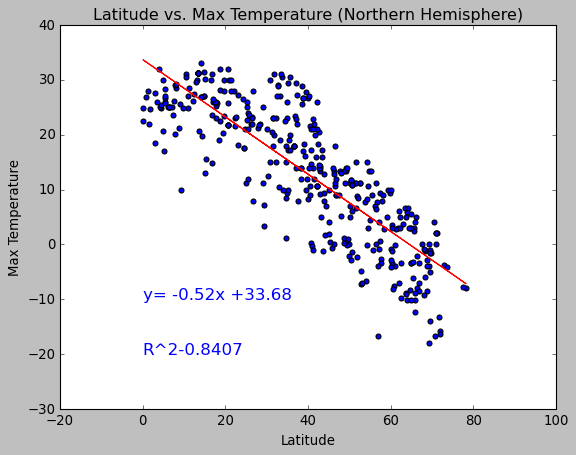

In [58]:
x_values = Northern["Lat"]
y_values = Northern["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,-10), fontsize=15,color="blue")
plt.title("Latitude vs. Max Temperature (Northern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.style.use("classic")
R2="R^2"+str(round(rvalue,4))
plt.annotate(R2,(0,-20), fontsize=15, color='blue')
print(f"The correlation coefficient(R^2) is:{rvalue}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient(R^2) is:0.7382269625319711


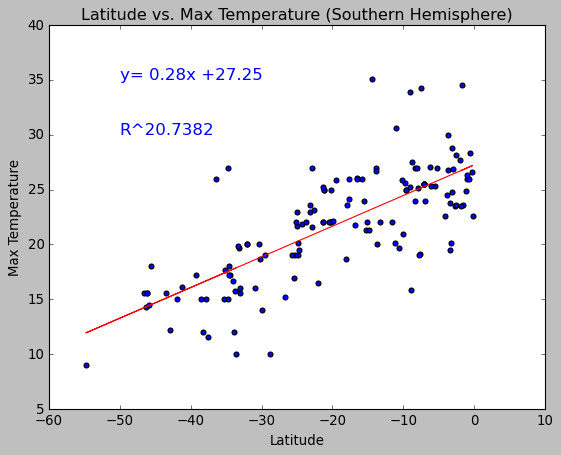

In [61]:
x_values = Southern["Lat"]
y_values = Southern["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,35), fontsize=15,color="blue")
plt.title("Latitude vs. Max Temperature (Southern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.style.use("classic")
R2="R^2"+str(round(rvalue,4))
plt.annotate(R2,(-50,30), fontsize=15, color='blue')
print(f"The correlation coefficient(R^2) is:{rvalue}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient(R^2) is:0.3407846167454678


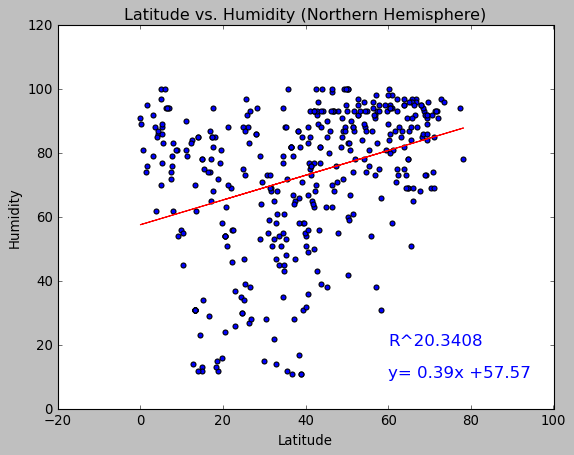

In [64]:
x_values = Northern["Lat"]
y_values = Northern["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(60,10), fontsize=15,color="blue")
plt.title("Latitude vs. Humidity (Northern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.style.use("classic")
R2="R^2"+str(round(rvalue,4))
plt.annotate(R2,(60,20), fontsize=15, color='blue')
print(f"The correlation coefficient(R^2) is:{rvalue}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient(R^2) is:0.10772807210762626


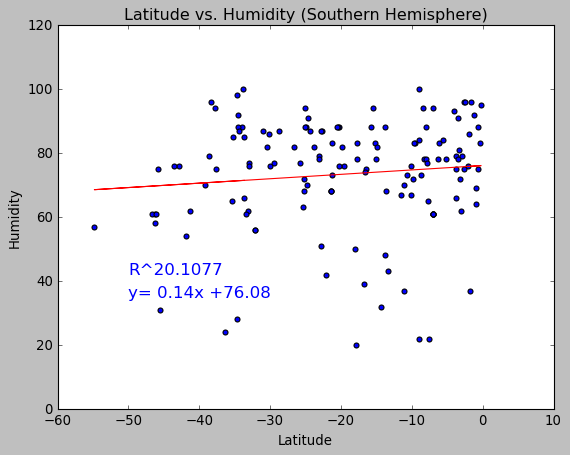

In [66]:
x_values = Southern["Lat"]
y_values = Southern["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,35), fontsize=15,color="blue")
plt.title("Latitude vs. Humidity (Southern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.style.use("classic")
R2="R^2"+str(round(rvalue,4))
plt.annotate(R2,(-50,42), fontsize=15, color='blue')
print(f"The correlation coefficient(R^2) is:{rvalue}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient(R^2) is:0.12072550405634278


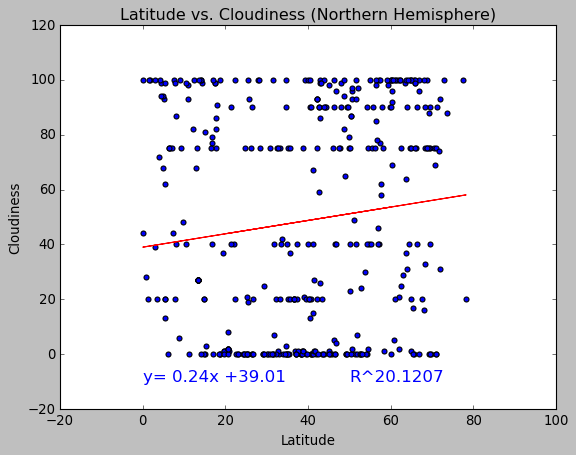

In [69]:
x_values = Northern["Lat"]
y_values = Northern["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,-10), fontsize=15,color="blue")
plt.title("Latitude vs. Cloudiness (Northern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.style.use("classic")
R2="R^2"+str(round(rvalue,4))
plt.annotate(R2,(50,-10), fontsize=15, color='blue')
print(f"The correlation coefficient(R^2) is:{rvalue}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient(R^2) is:0.04807247280406482


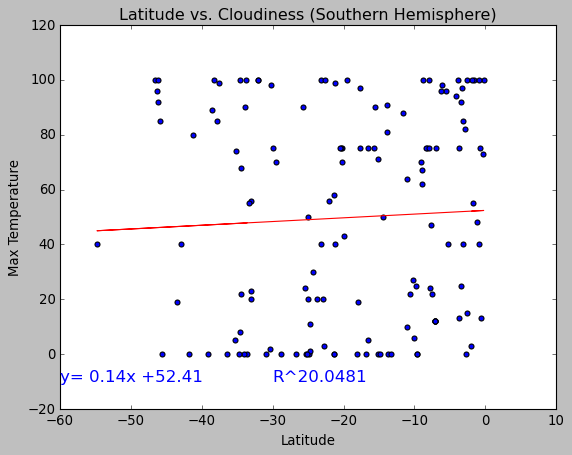

In [72]:
x_values = Southern["Lat"]
y_values = Southern["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-60,-10), fontsize=15,color="blue")
plt.title("Latitude vs. Cloudiness (Southern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.style.use("classic")
R2="R^2"+str(round(rvalue,4))
plt.annotate(R2,(-30,-10), fontsize=15, color='blue')
print(f"The correlation coefficient(R^2) is:{rvalue}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient(R^2) is:0.23915243360991983


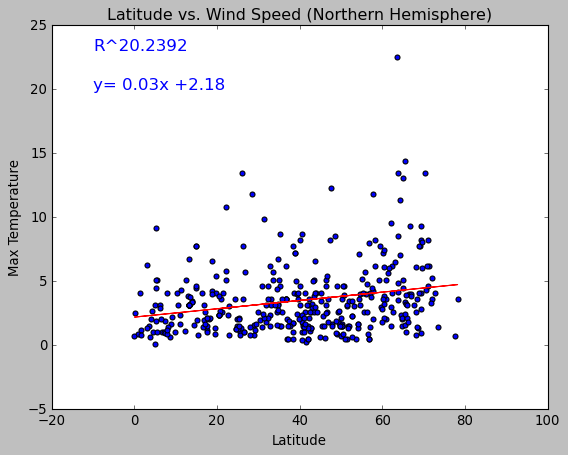

In [75]:
x_values = Northern["Lat"]
y_values = Northern["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-10,20), fontsize=15,color="blue")
plt.title("Latitude vs. Wind Speed (Northern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.style.use("classic")
R2="R^2"+str(round(rvalue,4))
plt.annotate(R2,(-10,23), fontsize=15, color='blue')
print(f"The correlation coefficient(R^2) is:{rvalue}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient(R^2) is:-0.1178961414409776


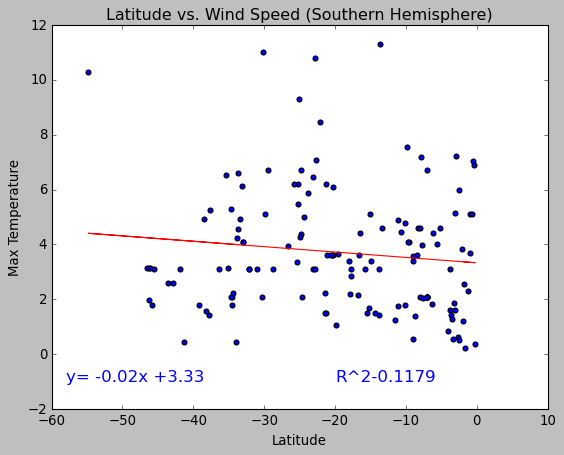

In [77]:
x_values = Southern["Lat"]
y_values = Southern["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-58,-1), fontsize=15,color="blue")
plt.title("Latitude vs. Wind Speed (Southern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.style.use("classic")
R2="R^2"+str(round(rvalue,4))
plt.annotate(R2,(-20,-1), fontsize=15, color='blue')
print(f"The correlation coefficient(R^2) is:{rvalue}")
plt.show()